In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from emocoder.src import utils, constants
from emocoder.experiments import constants as xconstants

In [2]:
acl_columnwidth_in_inch = 7.7 / 2.54

In [3]:
split = "test"  # dev or test

In [4]:
baseline =pd.read_csv(xconstants.TEXT_BASELINE_BASEPATH/ split / "overview.csv", index_col=0)
baseline.rename(inplace=True, columns={"0":"acc"})
#baseline.drop(inplace=True, columns="mean")
baseline

,acc,valence,arousal,dominance,joy,anger,sadness,fear,disgust,f1_disgust,...,prec_sadness,f1_anger,rec_anger,prec_anger,f1_joy,rec_joy,prec_joy,f1_fear,f1_mean,mean
sst2cls,0.916529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743784,...,0.680916,0.835463,0.853181,0.818466,0.676963,0.695767,0.659148,0.634265,0.698637,NaN
isear,0.714477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emobank,NaN,0.795119,0.562373,0.517827,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625106
cvat,NaN,0.867669,0.619318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743494
afftext,NaN,NaN,NaN,NaN,0.767374,0.62457,0.827092,0.857833,0.658407,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747055


In [5]:
proposed = pd.read_csv(xconstants.TEXT_PROPOSED_BASEPATH/ split / "overview.csv", index_col=0)
#proposed.drop(inplace=True, columns="mean")
proposed

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
emobank,0.792993,0.554061,0.506249,NaN,NaN,NaN,NaN,NaN,0.617768
cvat,0.868994,0.602421,NaN,NaN,NaN,NaN,NaN,NaN,0.735707
afftext,NaN,NaN,NaN,0.784822,0.624712,0.805514,0.840388,0.690909,0.749269


In [6]:
if split == "dev":
    multitask = pd.read_csv(xconstants.TEXT_MULTITASK_BASEPATH/ split / "overview.csv", index_col=[0,1])
    multitask = multitask.loc["emobank-afftext"]   #removing results for sst-emobank training
    multitask.drop(inplace=True, index="overall")
    multitask.drop(inplace=True, index="SST_2_Class")
    multitask.drop(inplace=True, columns=["acc"])
    multitask.rename(inplace=True, index={"EmoBank": "emobank", "AffTextBE5": "afftext"})
if split == "test":
    multitask = pd.read_csv(xconstants.TEXT_MULTITASK_BASEPATH/ split / "overview.csv", index_col=[0])
    multitask.rename(inplace=True, index={"EmoBank": "emobank", "AffTextBE5": "afftext"})

multitask

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
emobank,0.79663,0.549006,0.498526,NaN,NaN,NaN,NaN,NaN,0.614721
afftext,NaN,NaN,NaN,0.767648,0.641433,0.82661,0.832574,0.647199,0.743093


In [7]:
augmented = pd.read_csv(xconstants.TEXT_AUGMENTED_BASEPATH/ split / "overview.csv", index_col=0)
augmented.rename(inplace=True, index={"EmoBank-augmented": "emobank", 
                                      "CVAT-augmented": "cvat",
                                      "AffText-augmented": "afftext"})
#augmented.drop(inplace=True, columns="mean")
augmented

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
emobank,0.793540,0.561361,0.531394,NaN,NaN,NaN,NaN,NaN,0.628765
cvat,0.884391,0.629874,NaN,NaN,NaN,NaN,NaN,NaN,0.757132
afftext,NaN,NaN,NaN,0.762417,0.66618,0.81602,0.840778,0.704714,0.758022


In [8]:
zeroshotbaseline = pd.read_csv(xconstants.TEXT_ZEROSHOTBASELINE_BASEPATH/ split / "overview.csv", index_col=0)
#zeroshotbaseline.drop(inplace=True, columns="mean")
zeroshotbaseline

,acc,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
sst2cls,0.83196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emobank,NaN,0.658557,0.158261,0.297493,NaN,NaN,NaN,NaN,NaN,0.371437
afftext,NaN,NaN,NaN,NaN,0.710671,0.478366,0.732654,0.67192,0.270994,0.572921


In [9]:
zeroshot = pd.read_csv(xconstants.TEXT_ZEROSHOT_BASEPATH/ split / "overview.csv", index_col=0)
zeroshot.rename(inplace=True, index={"EmoBank-zeroshot": "emobank", "AffText-zeroshot": "afftext"})
#zeroshot.drop(inplace=True, columns="mean")
zeroshot

,acc,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
sst2cls,0.839649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emobank,NaN,0.640338,0.098206,0.319027,NaN,NaN,NaN,NaN,NaN,0.352524
afftext,NaN,NaN,NaN,NaN,0.659043,0.210668,0.42417,0.395742,0.246466,0.387218


In [10]:
augzero = pd.read_csv(xconstants.TEXT_AUGZERO_BASEPATH/ split / "overview.csv", index_col=0)
augzero.rename(inplace=True, index={"emobank-augzero": "emobank", "afftext-augzero": "afftext"})
#augzero.drop(inplace=True, columns="mean")
augzero

,acc,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
sst2cls,0.836354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emobank,NaN,0.675991,0.206999,0.303061,NaN,NaN,NaN,NaN,NaN,0.395350
afftext,NaN,NaN,NaN,NaN,0.722665,0.537035,0.698375,0.661054,0.240693,0.571964


---

# Pairwaise Comparisons

In [11]:
(baseline-proposed).round(3)

,acc,anger,arousal,disgust,dominance,f1_anger,f1_anticipation,f1_disgust,f1_fear,f1_joy,...,rec_anticipation,rec_disgust,rec_fear,rec_joy,rec_mean,rec_sadness,rec_surprise,rec_trust,sadness,valence
afftext,NaN,-0.0,NaN,-0.033,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022,NaN
cvat,NaN,NaN,0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001
emobank,NaN,NaN,0.008,NaN,0.012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002
isear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sst2cls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
(multitask - proposed).round(2)

,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
afftext,NaN,NaN,NaN,-0.02,0.02,0.02,-0.01,-0.04,-0.01
cvat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emobank,0.0,-0.01,-0.01,NaN,NaN,NaN,NaN,NaN,-0.00


In [13]:
(augzero-zeroshot).round(2)

,acc,valence,arousal,dominance,joy,anger,sadness,fear,disgust,mean
sst2cls,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emobank,NaN,0.04,0.11,-0.02,NaN,NaN,NaN,NaN,NaN,0.04
afftext,NaN,NaN,NaN,NaN,0.06,0.33,0.27,0.27,-0.01,0.18


In [14]:
(zeroshot - proposed).round(2)

,acc,anger,arousal,disgust,dominance,fear,joy,mean,sadness,valence
afftext,NaN,-0.41,NaN,-0.44,NaN,-0.44,-0.13,-0.36,-0.38,NaN
cvat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emobank,NaN,NaN,-0.46,NaN,-0.19,NaN,NaN,-0.27,NaN,-0.15
sst2cls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--- 

# Overall Comparison

In [20]:
conditions = {
    "Bsl": baseline,
    "Sng": proposed,
    "Aug": augmented,
    "Mlt": multitask,
    "BsZ": zeroshotbaseline,
    "SnZ": zeroshot,
    "AuZ": augzero
}

outcome = pd.DataFrame({key: value["mean"] for key, value in conditions.items()})
#for key in ["Bsl", "Sng", "BsZ", "SnZ", "AuZ"]:
#    outcome.loc["sst2cls", key] = conditions.get(key).loc["sst2cls", "acc"]
outcome = outcome.loc[["emobank", "afftext", "cvat"]]
outcome.rename(inplace=True, index={
    "emobank": "EmoB (r)",
    "afftext": "AffT (r)",
    "cvat": "CVAT (r)",
    # "sst2cls": "SST (acc)"
})
#outcome.drop(index="SST (acc)", inplace=True)
outcome.loc["MEAN"] = outcome.mean(axis=0)
outcome = outcome.round(3)
outcome 

,Bsl,Sng,Aug,Mlt,BsZ,SnZ,AuZ
EmoB (r),0.625,0.618,0.629,0.615,0.371,0.353,0.395
AffT (r),0.747,0.749,0.758,0.743,0.573,0.387,0.572
CVAT (r),0.743,0.736,0.757,NaN,NaN,NaN,NaN
MEAN,0.705,0.701,0.715,0.679,0.472,0.370,0.484


In [21]:
print(outcome.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    Bsl &    Sng &    Aug &    Mlt &    BsZ &    SnZ &    AuZ \\
\midrule
EmoB (r) &  0.625 &  0.618 &  0.629 &  0.615 &  0.371 &  0.353 &  0.395 \\
AffT (r) &  0.747 &  0.749 &  0.758 &  0.743 &  0.573 &  0.387 &  0.572 \\
CVAT (r) &  0.743 &  0.736 &  0.757 &    NaN &    NaN &    NaN &    NaN \\
MEAN     &  0.705 &  0.701 &  0.715 &  0.679 &  0.472 &  0.370 &  0.484 \\
\bottomrule
\end{tabular}



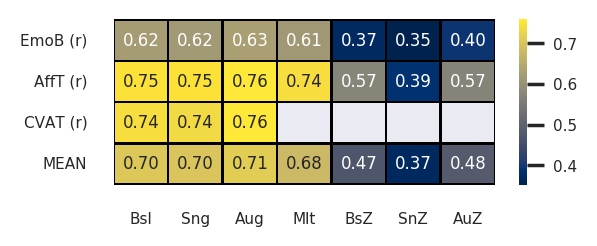

In [22]:
sns.set(font_scale=.5)
fig, ax = plt.subplots(figsize=(acl_columnwidth_in_inch, .4*acl_columnwidth_in_inch), dpi=200)
sns.heatmap(data=outcome,ax=ax, annot=True, cmap="cividis", fmt=".2f", linewidth=.5, linecolor="black")
#ax.set_xlabel("Condition")
#ax.set_ylabel("Dataset")
#ax.set_title("Word Dataset Dev Results")b
fig.tight_layout()
fig.savefig("text-test-results.pdf")

In [ ]:
round(augzero - zeroshotbaseline,2)

---